<a href="https://colab.research.google.com/github/dona-frj/semantic/blob/master/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
! unzip /content/drive/MyDrive/aquaint.zip -d'/content/data'

Archive:  /content/drive/MyDrive/aquaint.zip
replace /content/data/aquaint/RawText/APW19980603_0791.htm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!unzip aquaint.zip

unzip:  cannot find or open aquaint.zip, aquaint.zip.zip or aquaint.zip.ZIP.


In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize , sent_tokenize
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import strip_non_alphanum ,strip_short
from gensim.parsing.preprocessing import preprocess_documents
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
pip install tqdm

/////////////////////////// creat data to list

In [9]:
import os
from tqdm import tqdm
path = '/content/data/aquaint/RawText/'
list_txt=[]
tokenized_sent = [] #من اجل تخزين الجمل الماخوذة من النصوص
for txt  in os.listdir(path):
  f = open(os.path.join(path,txt), "r")         
  _txt= f.read()
  _txt=strip_multiple_whitespaces(_txt)
  _txt= remove_stopwords(_txt)
  _txt= sent_tokenize(_txt) 
  for i in _txt:
    t1=strip_non_alphanum(i) 
    t1=strip_short(t1,minsize=3)
    t2=remove_stopwords(t1)
    
  
    list_txt.append(t2)
list_txt

['LONDON Nov',
 'The apparent settlement came days talks involving West Indies players officials West Indies South Africa cricket boards',
 'The crisis came head Wednesday West Indies Cricket Board fired superstar batsman Brian Lara captain Carl Hooper vice captain',
 'The refused travel South Africa demanding better pay conditions tour',
 'Team members insisted Lara Hooper reinstated settlement',
 'Jimmy Adams treasurer players assocation negotiated behalf players Monday Pat Rousseau president West Indies Cricket Board',
 'Ali Bacher head South African cricket directly involved Monday talks sitting sidelines Sunday',
 'West Indies tour manager Clive Lloyd WICB member Joel Garner involved talks began Friday',
 'Progress reported weekend announcement sponsorship deal offered South African wicketkeeper David Richardson runs sports marketing firm Johannesburg',
 'Earnings sponsorship proposal apparently help meet players demands better pay reported range dlrs 000 000 South African tour',


In [10]:
for s in list_txt:
    tokenized_sent.append(word_tokenize(s.lower()))
len(tokenized_sent)
# tokenized_sent

517

In [11]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['london', 'nov'], tags=[0]),
 TaggedDocument(words=['the', 'apparent', 'settlement', 'came', 'days', 'talks', 'involving', 'west', 'indies', 'players', 'officials', 'west', 'indies', 'south', 'africa', 'cricket', 'boards'], tags=[1]),
 TaggedDocument(words=['the', 'crisis', 'came', 'head', 'wednesday', 'west', 'indies', 'cricket', 'board', 'fired', 'superstar', 'batsman', 'brian', 'lara', 'captain', 'carl', 'hooper', 'vice', 'captain'], tags=[2]),
 TaggedDocument(words=['the', 'refused', 'travel', 'south', 'africa', 'demanding', 'better', 'pay', 'conditions', 'tour'], tags=[3]),
 TaggedDocument(words=['team', 'members', 'insisted', 'lara', 'hooper', 'reinstated', 'settlement'], tags=[4]),
 TaggedDocument(words=['jimmy', 'adams', 'treasurer', 'players', 'assocation', 'negotiated', 'behalf', 'players', 'monday', 'pat', 'rousseau', 'president', 'west', 'indies', 'cricket', 'board'], tags=[5]),
 TaggedDocument(words=['ali', 'bacher', 'head', 'south', 'african', 'cric

In [12]:
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab
test_doc = word_tokenize("We to want projects success paper inspection to desired results added".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])


[(220, 0.9473789930343628),
 (212, 0.938668966293335),
 (213, 0.9360191822052002),
 (189, 0.9350255727767944),
 (410, 0.9333044290542603),
 (188, 0.9317430853843689),
 (375, 0.9283957481384277),
 (219, 0.9273859262466431),
 (69, 0.9263998866081238),
 (415, 0.9261520504951477)]


vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.

Estimated number of clusters: 3
Homogeneity: 0.862
Completeness: 0.862
V-measure: 0.862
Adjusted Rand Index: 0.897
Adjusted Mutual Information: 0.861
Silhouette Coefficient: 0.765


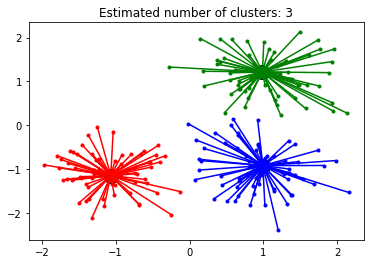

In [100]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=0.5,random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
pip install transformers 

In [109]:
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers
## for data
import json
import pandas as pd
import numpy as np

In [167]:
txt = list_txt[:510]
## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
## bert model
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
## return hidden layer with embeddings
input_ids = np.array(tokenizer.encode(txt))[None,:]  
embedding = nlp(input_ids)
embedding[0][0]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(512, 768), dtype=float32, numpy=
array([[-0.70967287,  0.3791944 , -0.27078778, ..., -0.4542855 ,
         1.0638672 ,  0.04008508],
       [ 0.0793393 ,  0.30528262,  0.70713264, ..., -0.241369  ,
         1.1431843 , -0.40103364],
       [-0.00127711,  0.09305574,  0.7943262 , ..., -0.3208799 ,
         0.68062603, -0.42115125],
       ...,
       [-0.05463764,  0.6642243 ,  0.33833376, ..., -0.5307733 ,
         0.38544536, -1.0119562 ],
       [-0.0854707 ,  0.6686476 ,  0.4247035 , ..., -0.6001418 ,
         0.39714566, -1.0350313 ],
       [-0.58235294,  0.87040734, -0.15144593, ..., -0.0492102 ,
         0.3781346 , -0.14580736]], dtype=float32)>

In [173]:
lst_dics = txt
## print the first one
lst_dics[0]
## create dtf
dtf = pd.DataFrame(lst_dics)
## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
## print 10 random rows
# dtf.sample(10)
print('the number of vector is: ',len(lst_dics))
print(dtf)

the number of vector is:  510


TypeError: ignored

In [ ]:
pip install sentence_transformers

In [177]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk import sent_tokenize
from sentence_transformers import SentenceTransformer
import os

base_document = ['hello world, i love you','i hate this', 'story about how the world can grow '] ####must add my clean data here to compare with!!
documents = ["what a wonderful World  ".lower()]  ####the text to compare with

def process_bert_similarity():
	# This will download and load the pretrained model offered by UKPLab.
	model = SentenceTransformer('bert-base-nli-mean-tokens')

	# Although it is not explicitly stated in the official document of sentence transformer, the original BERT is meant for a shorter sentence. We will feed the model by sentences instead of the whole documents.
	sentences = base_document
	base_embeddings_sentences = model.encode(sentences)
	base_embeddings = np.mean(np.array(base_embeddings_sentences), axis=0)

	vectors = []
	for i, document in enumerate(base_document):

		sentences = sent_tokenize(document)
		embeddings_sentences = model.encode(sentences)
		embeddings = np.mean(np.array(embeddings_sentences), axis=0)

		vectors.append(embeddings)

		print("making vector at index:", i)

	scores = cosine_similarity([base_embeddings],vectors).flatten()

	highest_score = 0
	highest_score_index = 0
	for i, score in enumerate(scores):
		if highest_score < score:
			highest_score = score
			highest_score_index = i

	most_similar_document = base_document[highest_score_index]
	print(documents ,'\n',"Most similar document by BERT with the score:", "\n", [most_similar_document],'with accuracy : ', highest_score)

process_bert_similarity()
# print(base_document)

making vector at index: 0
making vector at index: 1
making vector at index: 2
['what a wonderful world  '] 
 Most similar document by BERT with the score: 
 ['hello world, i love you'] with accuracy :  0.8002763
